<a href="https://colab.research.google.com/github/choarauc/form/blob/main/AK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>AK</h1></center>
<center><h2>Case study data</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">


 Nous allons travailler avec la base de données **```Case study data```**. Cette base contient initialement ;

 - 0   order_id    
 - 1   checkout_id              
 - 2   brand_id                 
 - 3   retailer_id              
 - 4   order_amount           
 - 5   has_discount             
 - 6   fees_percentage        
 - 7   payment_cost_percentage  
 - 8   shipping_cost_euro       

> La structure de l'exercice est la suivante : 
>> I - [Traitement du dataset](#preparation)
>>> A - [Preprocessing Python](#affichage)
>>>
>>>
>>> B - [Data visualisation](#generateurs)
>>
>>
>> II - [1er Itération SQL](#classif)
>>> A - [Preprocessing SQL](#affichage2)
>>>
>>>
>>> B - [Data visualisation](#generateurs2)
>>
>>
>> III - [Conclusion](#test)

- Exécuter les cellules ci-dessous pour importer le dataset 

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving df.csv to df.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import  push_notebook,output_notebook, show
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import plotly.express as px
import statsmodels.api
output_notebook()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('df.csv', delimiter = ';')
df.info()
print("Le dataframe pour contient", df.shape[0], 'lignes et', df.shape[1], 'colonnes.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 3354 non-null   int64 
 1   checkout_id              3354 non-null   int64 
 2   brand_id                 3354 non-null   int64 
 3   retailer_id              3354 non-null   int64 
 4   order_amount             3354 non-null   object
 5   has_discount             3354 non-null   int64 
 6   fees_percentage          3354 non-null   object
 7   payment_cost_percentage  3354 non-null   object
 8   shipping_cost_euro       3354 non-null   object
dtypes: int64(5), object(4)
memory usage: 236.0+ KB
Le dataframe pour contient 3354 lignes et 9 colonnes.


In [ ]:
#Extrait du DF 
df.sample(10)

,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro
1293,5799,735,381,514,228,0,"0,15","0,05","10,5"
1427,7500,921,415,17,"130,8",0,"0,15","0,05","8,94"
1664,5573,1275,462,1344,"143,32",0,"0,15","0,05","4,9755474"
2630,9083,3204,861,6163,126,0,"0,15","0,05",30
482,1584,687,120,1737,"109,87",0,"0,15","0,05",5
405,2249,1030,95,2482,"383,22",100,"0,05","0,05","21,5"
799,3257,1455,254,373,"120,52",0,"0,15","0,05","91,69"
914,10866,3751,285,6822,"161,42",100,"0,05","0,05","21,6"
481,1192,567,120,610,"315,45",0,"0,15","0,05",25
1464,1981,894,420,1729,126,0,"0,15","0,05","13,9"


<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>  I - <a name="preparation"></a> Traitement du dataset
 </h1></center>
<hr style="border-width:2px;border-color:#75DFC1">



## A - <a name="affichage"></a> Preprocessing


In [ ]:
#Convert object to float 

def convert_money(value): 
       value = value.replace(',', '.') 
       return float(value)

df['order_amount'] = df['order_amount'].apply(convert_money)
df['fees_percentage'] = df['fees_percentage'].apply(convert_money)
df['payment_cost_percentage'] = df['payment_cost_percentage'].apply(convert_money)
df['shipping_cost_euro'] = df['shipping_cost_euro'].apply(convert_money)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 3354 non-null   int64  
 1   checkout_id              3354 non-null   int64  
 2   brand_id                 3354 non-null   int64  
 3   retailer_id              3354 non-null   int64  
 4   order_amount             3354 non-null   float64
 5   has_discount             3354 non-null   int64  
 6   fees_percentage          3354 non-null   float64
 7   payment_cost_percentage  3354 non-null   float64
 8   shipping_cost_euro       3354 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 236.0 KB


In [ ]:
# Je suppose que 'Order_amount' est HT 
# Si 'Has_discount' = 100 > Fees calculer sur 'Order_amount' total 

df['fees'] = df['order_amount'] * df['fees_percentage']

# Meme raisonnement pour le coût crédit 

df['insurance'] = df['order_amount'] * df['payment_cost_percentage']

# Resultat 

df['CA_without_discount'] = df['fees'] - df['shipping_cost_euro'] - df['insurance']
df['CA'] = df['CA_without_discount'] - df['has_discount']

df.sample(5)

,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
2068,7886,2852,644,5706,138.42,0,0.15,0.05,22.960000,20.7630,6.9210,-9.118000,-9.118000
1174,3360,1447,355,230,229.15,100,0.05,0.05,25.690000,11.4575,11.4575,-25.690000,-125.690000
1236,1961,580,372,1500,261.60,100,0.05,0.05,38.361160,13.0800,13.0800,-38.361160,-138.361160
348,1288,653,86,1022,283.92,0,0.15,0.05,21.785798,42.5880,14.1960,6.606202,6.606202
382,865,471,95,1270,408.96,100,0.05,0.05,12.000000,20.4480,20.4480,-12.000000,-112.000000


Chiffres cles à ce stade 

In [ ]:
print('Volume d affaire ' , df.order_amount.sum())

print('Nombre de commandes' , df.order_amount.count())

print('panier moyen' , df.order_amount.sum() / df.order_amount.count())

print('total com brute' , df.fees.sum())

print('cout total shipping' , df.shipping_cost_euro.sum())

print('cout total 100' , df.has_discount.sum())

print('ratio / shipping' , df.shipping_cost_euro.sum() / df.fees.sum())

print('total insurance' , df.insurance.sum())

print('ratio / insurance' , df.insurance.sum() / df.fees.sum())

print('CA net' , df.CA.sum())

Volume d affaire  712894.62
Nombre de commandes 3354
panier moyen 212.55057245080502
total com brute 92793.162
cout total shipping 74196.29139073999
cout total 100 51800
ratio / shipping 0.7995879199669906
total insurance 35644.731
ratio / insurance 0.38413100956727825
CA net -68847.86039074001


Occurence des bons de 100 €

In [ ]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

lst = df.has_discount

x = 100

print('{} has occurred {} times'.format(x, countX(lst, x)) )
print(countX(lst, x) * x)

100 has occurred 518 times
51800


## B - <a name="generateurs"></a> Data Visualisation



In [ ]:
# Calcul des corrélations de Pearson sur les variables quantitatives
corr = df.corr()

# Affichage de la heatmap de ces corrélations
corr.style.background_gradient(cmap='Reds')

# On constate une corrélation entre Order_amount / Shipping, probablement due au poids des colis, revenir dessus plus tard 

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
order_id,1.000000,0.845005,0.526888,0.518478,-0.005748,-0.158252,0.158252,nan,0.058081,0.039614,-0.005748,-0.019812,0.105853
checkout_id,0.845005,1.000000,0.441591,0.646973,0.021495,-0.064152,0.064152,nan,0.067552,0.032171,0.021495,-0.047661,0.022426
brand_id,0.526888,0.441591,1.000000,0.276264,-0.016868,-0.174844,0.174844,nan,0.034406,0.042924,-0.016868,0.013255,0.135118
retailer_id,0.518478,0.646973,0.276264,1.000000,0.025811,0.096521,-0.096521,nan,0.017407,-0.025148,0.025811,-0.054187,-0.098818
order_amount,-0.005748,0.021495,-0.016868,0.025811,1.000000,0.139263,-0.139263,nan,0.456307,0.899560,1.000000,0.071073,-0.065426
has_discount,-0.158252,-0.064152,-0.174844,0.096521,0.139263,1.000000,-1.000000,nan,-0.027151,-0.227875,0.139263,-0.256627,-0.866257
fees_percentage,0.158252,0.064152,0.174844,-0.096521,-0.139263,-1.000000,1.000000,nan,0.027151,0.227875,-0.139263,0.256627,0.866257
payment_cost_percentage,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
shipping_cost_euro,0.058081,0.067552,0.034406,0.017407,0.456307,-0.027151,0.027151,nan,1.000000,0.470594,0.456307,-0.761683,-0.373803
fees,0.039614,0.032171,0.042924,-0.025148,0.899560,-0.227875,0.227875,nan,0.470594,1.000000,0.899560,0.195903,0.268434


> Toutes les visu sont clickables pour plus d'informations

#Classement clients

In [ ]:
fig = px.treemap(df, path=['retailer_id', 'brand_id'], values='order_amount', color='brand_id')
fig.show()

# le client 1788 à dépenser 5734.64 € chez le vendeur 806 ou 2377.65 chez 924 

# Fournisseurs en volume d'affaires

In [ ]:
fig = px.treemap(df, path=['brand_id'], values='order_amount', color='brand_id')
fig.show()

# le frs 95 a vendu pour 16353 €

# Fournisseurs en fees

In [ ]:
fig = px.treemap(df, path=['brand_id', 'order_amount'], values='fees', color='brand_id')
fig.show()

# le frs 806 a rapporté pour 2092 €

# Fournisseurs en net

In [ ]:
fig = px.treemap(df, path=['brand_id', 'CA'], values='fees', color='CA')
fig.show()

# le frs 806 qui a rapporté pour 2092 € de fees à généré 16€ net

In [ ]:
#Méthode ANOVA order_amount / shipping_cost

import statsmodels.api 


result = statsmodels.formula.api.ols('shipping_cost_euro ~ order_amount', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
order_amount,1.0,5.294300e+05,529429.982846,881.475828,3.505219e-172
Residual,3352.0,2.013271e+06,600.617698,NaN,NaN


# **analyse rapide des retailers**

In [ ]:
fig = px.scatter(df, x="retailer_id", y="brand_id", size="order_amount", color="CA",
           hover_name="CA", log_x=True, size_max=60)

fig2 = px.scatter(df, x="retailer_id", y="brand_id", size="order_amount", color="order_amount",
           hover_name="CA", log_x=True, size_max=60)

fig3 = px.scatter(df, x="order_amount", y="fees", size="brand_id", color="fees",
           hover_name="CA", log_x=True, size_max=60)

fig4 = px.scatter(df, x="order_amount", y="fees", size="shipping_cost_euro", color="shipping_cost_euro",
           hover_name="CA", log_x=True, size_max=60)

fig5 = px.scatter(df, x="order_amount", y="fees", size="insurance", color="insurance",
           hover_name="CA", log_x=True, size_max=60)



fig.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

# on voit bien le retailer 1788 et brand 806 quelque ssoit la métrique

*Nous allons avancer rapidement sur les différents graphiques pour comprendre certaines variables*

In [ ]:
n_qty = lambda qty: len(np.unique(qty))

functions_to_apply = {
    'order_amount' : ['min', 'max', 'sum'],
    'brand_id' : n_qty
}

df.groupby('retailer_id').agg(functions_to_apply)

order_amount                  brand_id
                     min     max      sum <lambda>
retailer_id                                       
8                 105.40  411.32  3305.15       13
17                105.00  418.85  7738.05       38
35                112.00  195.85   580.97        4
74                123.00  123.00   123.00        1
96                100.00  288.00   388.00        2
...                  ...     ...      ...      ...
7096              126.36  126.36   126.36        1
7108              487.27  487.27   487.27        1
7140              126.90  360.57   730.85        3
7144              125.76  125.76   125.76        1
7146              339.71  339.71   339.71        1

[888 rows x 4 columns]

In [ ]:
n_qty = lambda qty: len(np.unique(qty))

functions_to_apply = {
    'CA' : ['min', 'max', 'sum'],
    'brand_id' : n_qty
}

df.groupby('retailer_id').agg(functions_to_apply)

# allons voir les clients 230 / 1173 / 1046 / 2157

CA                         brand_id
                    min         max         sum <lambda>
retailer_id                                             
8            -60.046000   15.739899  -57.835213       13
17          -134.874086   20.353168 -398.177555       38
35           -15.415000    2.472000  -13.398271        4
74             5.668884    5.668884    5.668884        1
96            -7.390000   14.770000    7.380000        2
...                 ...         ...         ...      ...
7096           0.636000    0.636000    0.636000        1
7108          42.727000   42.727000   42.727000        1
7140          -0.390000   32.157000   40.748822        3
7144           1.792215    1.792215    1.792215        1
7146        -122.482650 -122.482650 -122.482650        1

[888 rows x 4 columns]

In [ ]:
df[(df['retailer_id'] == 230)]

,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
678,3508,1499,203,230,124.70,0,0.15,0.05,19.85,18.7050,6.2350,-7.380,-7.380
813,1468,724,257,230,168.80,100,0.05,0.05,13.60,8.4400,8.4400,-13.600,-113.600
901,3507,1499,285,230,213.11,0,0.15,0.05,90.00,31.9665,10.6555,-68.689,-68.689
902,7645,1876,285,230,241.81,0,0.15,0.05,90.00,36.2715,12.0905,-65.819,-65.819
938,1465,722,294,230,156.14,100,0.05,0.05,16.80,7.8070,7.8070,-16.800,-116.800
1174,3360,1447,355,230,229.15,100,0.05,0.05,25.69,11.4575,11.4575,-25.690,-125.690
1709,2539,725,485,230,324.74,100,0.05,0.05,80.00,16.2370,16.2370,-80.000,-180.000
2093,3404,1478,662,230,163.70,100,0.05,0.05,98.74,8.1850,8.1850,-98.740,-198.740
3156,10550,2822,1052,230,210.59,0,0.15,0.05,48.00,31.5885,10.5295,-26.941,-26.941


In [ ]:
df[(df['retailer_id'] == 1173)]

,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
70,1444,410,25,1173,122.16,100,0.05,0.05,8.745366,6.1080,6.1080,-8.745366,-108.745366
335,744,721,85,1173,144.36,100,0.05,0.05,9.254083,7.2180,7.2180,-9.254083,-109.254083
350,1446,410,86,1173,185.76,0,0.15,0.05,24.583849,27.8640,9.2880,-6.007849,-6.007849
351,5442,1774,86,1173,285.12,0,0.15,0.05,30.846241,42.7680,14.2560,-2.334241,-2.334241
531,10377,3056,144,1173,325.66,0,0.15,0.05,16.800000,48.8490,16.2830,15.766000,15.766000
701,860,467,221,1173,144.02,100,0.05,0.05,16.314327,7.2010,7.2010,-16.314327,-116.314327
772,2238,721,245,1173,174.60,100,0.05,0.05,15.000000,8.7300,8.7300,-15.000000,-115.000000
835,11211,3056,268,1173,124.20,0,0.15,0.05,11.002191,18.6300,6.2100,1.417809,1.417809
991,4017,1650,309,1173,286.80,0,0.15,0.05,12.950000,43.0200,14.3400,15.730000,15.730000
1256,1445,410,376,1173,120.00,0,0.15,0.05,8.940000,18.0000,6.0000,3.060000,3.060000


In [ ]:
df[(df['retailer_id'] == 1046)]

,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
81,2266,1029,27,1046,102.00,100,0.05,0.05,22.450000,5.100,5.100,-22.450000,-122.450000
134,2262,1029,39,1046,112.00,100,0.05,0.05,19.550000,5.600,5.600,-19.550000,-119.550000
289,896,495,79,1046,252.00,0,0.15,0.05,47.340000,37.800,12.600,-22.140000,-22.140000
349,1459,495,86,1046,333.60,0,0.15,0.05,18.183769,50.040,16.680,15.176231,15.176231
514,1460,495,135,1046,119.88,0,0.15,0.05,17.550000,17.982,5.994,-5.562000,-5.562000
767,2243,829,237,1046,132.00,100,0.05,0.05,10.930000,6.600,6.600,-10.930000,-110.930000
834,1741,810,268,1046,221.60,0,0.15,0.05,16.000000,33.240,11.080,6.160000,6.160000
896,1686,803,284,1046,159.00,0,0.15,0.05,10.499340,23.850,7.950,5.400660,5.400660
979,1458,495,306,1046,108.00,0,0.15,0.05,14.930000,16.200,5.400,-4.130000,-4.130000
995,1457,495,310,1046,212.00,0,0.15,0.05,37.000000,31.800,10.600,-15.800000,-15.800000


In [ ]:
df[(df['retailer_id'] == 2157)]

#ce client ne commande qu'avec le bon de 100 €

,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
793,2007,920,251,2157,125.97,100,0.05,0.05,50.320000,6.2985,6.2985,-50.320000,-150.320000
1204,2128,920,362,2157,120.00,100,0.05,0.05,5.957292,6.0000,6.0000,-5.957292,-105.957292
1238,1964,920,372,2157,184.80,100,0.05,0.05,21.583971,9.2400,9.2400,-21.583971,-121.583971
1365,3245,975,394,2157,133.20,100,0.05,0.05,20.320000,6.6600,6.6600,-20.320000,-120.320000


On remarque 2 sources de pertes reccurentes 

l'offre de 100 € 
le cout shipping > au fees 

Travaillons sur les pertes 

In [ ]:
df_perte = df[df['CA'] < 0]
df_perte.shape

#sur 3354 lignes de départ, 54% sont à perte

(1809, 13)

In [ ]:
corr = df_perte.corr()
corr.style.background_gradient(cmap='Blues')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning:

All-NaN slice encountered



,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
order_id,1.000000,0.852511,0.539085,0.528583,-0.013642,-0.217224,0.217224,nan,0.109635,0.083016,-0.013642,-0.066931,0.146960
checkout_id,0.852511,1.000000,0.459599,0.665028,0.032966,-0.097397,0.097397,nan,0.107515,0.064513,0.032966,-0.092113,0.034638
brand_id,0.539085,0.459599,1.000000,0.283556,-0.051271,-0.231512,0.231512,nan,0.072899,0.067083,-0.051271,-0.022974,0.180963
retailer_id,0.528583,0.665028,0.283556,1.000000,0.054190,0.102589,-0.102589,nan,0.004118,-0.035230,0.054190,-0.047310,-0.109122
order_amount,-0.013642,0.032966,-0.051271,0.054190,1.000000,0.280555,-0.280555,nan,0.430219,0.773948,1.000000,-0.251868,-0.360066
has_discount,-0.217224,-0.097397,-0.231512,0.102589,0.280555,1.000000,-1.000000,nan,-0.178531,-0.266482,0.280555,-0.065907,-0.864767
fees_percentage,0.217224,0.097397,0.231512,-0.102589,-0.280555,-1.000000,1.000000,nan,0.178531,0.266482,-0.280555,0.065907,0.864767
payment_cost_percentage,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
shipping_cost_euro,0.109635,0.107515,0.072899,0.004118,0.430219,-0.178531,0.178531,nan,1.000000,0.594987,0.430219,-0.897892,-0.303413
fees,0.083016,0.064513,0.067083,-0.035230,0.773948,-0.266482,0.266482,nan,0.594987,1.000000,0.773948,-0.215639,0.113082


In [ ]:
# modalités de la variable retailer_id avec leurs fréquences respectives.

print(df['retailer_id'].value_counts(normalize=True))

17      0.012224
2133    0.009541
556     0.007454
1463    0.007156
1173    0.006857
          ...   
3270    0.000298
3262    0.000298
3261    0.000298
3260    0.000298
5131    0.000298
Name: retailer_id, Length: 888, dtype: float64


In [ ]:
# modalité la plus fréquente de retailer_id

print(df['retailer_id'].mode())

0    17
dtype: int64


* audit du retailer 17

In [ ]:
df17 = df[df['retailer_id'] == 17]

print(' nombre de commandes ', df17.CA.count())
print(' perte nette cumulée ',df17.CA.sum())

 nombre de commandes  41
 perte nette cumulée  -398.17755522000004


In [ ]:
# modalités de la variable brand_id avec leurs fréquences respectives.

print(df['brand_id'].value_counts(normalize=True))

95      0.014013
79      0.013715
909     0.012224
876     0.012224
31      0.011032
          ...   
222     0.000298
217     0.000298
822     0.000298
824     0.000298
1257    0.000298
Name: brand_id, Length: 672, dtype: float64


audit rapide du brand 95

In [ ]:
df95 = df[df['brand_id'] == 95]

print(' nombre de commandes ', df95.CA.count())
print(' perte nette cumulée ', df95.CA.sum())


df95


# 9 commandes sans promos sur 47

 nombre de commandes  47
 perte nette cumulée  -4262.496999999999


,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
378,7610,3381,95,17,164.34,0,0.15,0.05,13.0,24.6510,8.2170,3.434,3.434
379,728,401,95,533,363.00,100,0.05,0.05,12.0,18.1500,18.1500,-12.000,-112.000
380,2718,1241,95,979,147.72,0,0.15,0.05,11.5,22.1580,7.3860,3.272,3.272
381,871,475,95,1258,500.16,100,0.05,0.05,12.0,25.0080,25.0080,-12.000,-112.000
382,865,471,95,1270,408.96,100,0.05,0.05,12.0,20.4480,20.4480,-12.000,-112.000
383,878,481,95,1287,417.18,100,0.05,0.05,12.0,20.8590,20.8590,-12.000,-112.000
384,879,482,95,1288,632.52,0,0.15,0.05,17.0,94.8780,31.6260,46.252,46.252
385,880,483,95,1289,382.20,100,0.05,0.05,12.0,19.1100,19.1100,-12.000,-112.000
386,881,484,95,1290,367.55,100,0.05,0.05,12.0,18.3775,18.3775,-12.000,-112.000
387,886,488,95,1293,407.16,100,0.05,0.05,12.0,20.3580,20.3580,-12.000,-112.000


<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>  II - <a name="classif"></a> Itération SQL
 </h1></center>
<hr style="border-width:2px;border-color:#75DFC1">

## A - <a name="affichage2"></a> Preprocessing SQL


*A priori l'offre des 100 n'est pas une bonne opération* 

```
#  allons voir le taux de conversion 
```

In [ ]:
import sqlite3

In [ ]:
def pd_to_sqlDB(input_df: pd.DataFrame,
                table_name: str,
                db_name: str = 'default.db') -> None:

    '''Take a Pandas dataframe `input_df` and upload it to `table_name` SQLITE table
    Args:
        input_df (pd.DataFrame): Dataframe containing data to upload to SQLITE
        table_name (str): Name of the SQLITE table to upload to
        db_name (str, optional): Name of the SQLITE Database in which the table is created. 
                                 Defaults to 'default.db'.
    '''

    # Step 1: Setup local logging
    import logging
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s: %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')

    # Step 2: Find columns in the dataframe
    cols = input_df.columns
    cols_string = ','.join(cols)
    val_wildcard_string = ','.join(['?'] * len(cols))

    # Step 3: Connect to a DB file if it exists, else crete a new file
    con = sqlite3.connect(db_name)
    cur = con.cursor()
    logging.info(f'SQL DB {db_name} created')

    # Step 4: Create Table
    sql_string = f"""CREATE TABLE {table_name} ({cols_string});"""
    cur.execute(sql_string)
    logging.info(f'SQL Table {table_name} created with {len(cols)} columns')

    # Step 5: Upload the dataframe
    rows_to_upload = input_df.to_dict(orient='split')['data']
    sql_string = f"""INSERT INTO {table_name} ({cols_string}) VALUES ({val_wildcard_string});"""    
    cur.executemany(sql_string, rows_to_upload)
    logging.info(f'{len(rows_to_upload)} rows uploaded to {table_name}')
  
    # Step 6: Commit the changes and close the connection
    con.commit()
    con.close()

In [ ]:
pd_to_sqlDB(df,
            table_name='table_df',
            db_name='default.db')

2022-04-26 08:49:20 INFO: SQL DB default.db created
2022-04-26 08:49:20 INFO: SQL Table table_df created with 13 columns
2022-04-26 08:49:20 INFO: 3354 rows uploaded to table_df


In [ ]:
def sql_query_to_pd(sql_query_string: str, db_name: str ='default.db') -> pd.DataFrame:
    '''Execute an SQL query and return the results as a pandas dataframe
    Args:
        sql_query_string (str): SQL query string to execute
        db_name (str, optional): Name of the SQLITE Database to execute the query in.
                                 Defaults to 'default.db'.
    Returns:
        pd.DataFrame: Results of the SQL query in a pandas dataframe
    '''    
    # Step 1: Connect to the SQL DB
    con = sqlite3.connect(db_name)

    # Step 2: Execute the SQL query
    cursor = con.execute(sql_query_string)

    # Step 3: Fetch the data and column names
    result_data = cursor.fetchall()
    cols = [description[0] for description in cursor.description]

    # Step 4: Close the connection
    con.close()

    # Step 5: Return as a dataframe
    return pd.DataFrame(result_data, columns=cols)

In [ ]:
sql_query_string = """

    SELECT distinct retailer_id
    FROM table_df as DF
    where has_discount = 100 
    order by retailer_id
"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,retailer_id
0,17
1,149
2,160
3,168
4,173
...,...
471,7030
472,7032
473,7033
474,7089


In [ ]:
sql_query_string = """
    select df1.retailer_id, sum(df1.CA) as total
    from table_df as df1  
    group by df1.retailer_id
    order by total desc
    limit 10
  
"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,retailer_id,total
0,1761,333.317390
1,4882,197.042000
2,200,162.355000
3,334,154.720000
4,2697,142.786000
5,3285,128.154000
6,5042,126.358000
7,1249,123.986128
8,5974,105.691000
9,6307,105.414486


In [ ]:
sql_query_string = """
    select df1.retailer_id, sum(df1.CA) as total
    from table_df as df1  
    group by df1.retailer_id
    order by total
    limit 10
  
"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,retailer_id,total
0,230,-903.659000
1,1173,-736.622502
2,1046,-594.797029
3,2157,-498.181263
4,1646,-495.226174
5,173,-415.482000
6,1201,-412.776596
7,4687,-410.850000
8,17,-398.177555
9,2133,-394.287464


In [ ]:
sql_query_string = """
    select df1.brand_id, sum(df1.CA) as total
    from table_df as df1  
    group by df1.brand_id
    order by total 
    limit 10
  
"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,brand_id,total
0,95,-4262.497000
1,31,-3630.600123
2,876,-3471.809000
3,909,-3403.266620
4,277,-2060.311152
5,852,-1982.628000
6,79,-1796.394480
7,21,-1683.583594
8,281,-1485.474612
9,285,-1374.178785


In [ ]:
sql_query_string = """
    select df1.* , top10.total
    from table_df as df1 , 
    ( SELECT distinct retailer_id
    FROM table_df as DF
    where has_discount = 100 ) as tmp_table,
    ( select df1.retailer_id, sum(df1.CA) as total
    from table_df as df1  
    group by df1.retailer_id
    order by total desc
    limit 10 ) as top10 
    where df1.retailer_id = tmp_table.retailer_id
    and top10.retailer_id = tmp_table.retailer_id
    order by df1.retailer_id
"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

#le top 10 clients n'a pas utilisé de 100

,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA,total


In [ ]:
sql_query_string = """
    select df1.retailer_id , top10.total
    from table_df as df1 , 
    ( SELECT distinct retailer_id
    FROM table_df as DF
    where has_discount = 100 ) as tmp_table,
    ( select df1.retailer_id, sum(df1.CA) as total
    from table_df as df1  
    group by df1.retailer_id
    order by total 
    limit 10 ) as top10 
    where df1.retailer_id = tmp_table.retailer_id
    and top10.retailer_id = tmp_table.retailer_id
    group by df1.retailer_id
    order by top10.total, df1.retailer_id
"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,retailer_id,total
0,230,-903.659000
1,1173,-736.622502
2,1046,-594.797029
3,2157,-498.181263
4,1646,-495.226174
5,173,-415.482000
6,1201,-412.776596
7,17,-398.177555
8,2133,-394.287464


In [ ]:
sql_query_string = """
    select *
    from table_df as df1  
    where df1.shipping_cost_euro > df1.order_amount
"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

# cout de transport > montant de la commande

,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
0,2666,1224,159,225,122.40,0,0.15,0.05,130.00,18.3600,6.1200,-117.760,-117.760
1,2255,608,159,1110,128.88,0,0.15,0.05,132.00,19.3320,6.4440,-119.112,-119.112
2,4733,1733,159,3140,122.40,0,0.15,0.05,150.00,18.3600,6.1200,-137.760,-137.760
3,9544,3353,389,781,142.45,0,0.15,0.05,280.52,21.3675,7.1225,-266.275,-266.275
4,7840,987,683,2342,40.00,0,0.15,0.05,77.27,6.0000,2.0000,-73.270,-73.270
5,7588,2745,718,17,112.99,0,0.15,0.05,120.00,16.9485,5.6495,-108.701,-108.701
6,5295,2036,718,4700,138.60,0,0.15,0.05,210.00,20.7900,6.9300,-196.140,-196.140
7,7630,1832,876,1201,112.29,0,0.15,0.05,193.00,16.8435,5.6145,-181.771,-181.771
8,6183,949,887,2226,105.00,0,0.15,0.05,141.86,15.7500,5.2500,-131.360,-131.360
9,9735,3197,1076,4275,149.52,0,0.15,0.05,211.86,22.4280,7.4760,-196.908,-196.908


In [ ]:
sql_query_string = """
    select *
    from table_df as df1  
    where df1.shipping_cost_euro > df1.fees
"""

# Step 4: Exectue the SQL query
result_df2 = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df2

# cout de transport > fees

,order_id,checkout_id,brand_id,retailer_id,order_amount,has_discount,fees_percentage,payment_cost_percentage,shipping_cost_euro,fees,insurance,CA_without_discount,CA
0,3259,1455,3,373,128.64,100,0.05,0.05,7.70,6.4320,6.4320,-7.700,-107.700
1,1050,570,12,1447,143.00,100,0.05,0.05,7.95,7.1500,7.1500,-7.950,-107.950
2,7878,2507,17,4275,100.00,0,0.15,0.05,16.30,15.0000,5.0000,-6.300,-6.300
3,934,35,21,160,124.80,100,0.05,0.05,12.00,6.2400,6.2400,-12.000,-112.000
4,2945,1331,21,1290,374.40,100,0.05,0.05,45.22,18.7200,18.7200,-45.220,-145.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,11872,1217,1196,2952,208.78,0,0.15,0.05,41.66,31.3170,10.4390,-20.782,-20.782
944,11368,2307,1200,2022,99.01,0,0.15,0.05,15.89,14.8515,4.9505,-5.989,-5.989
945,11534,1736,1200,4011,89.25,0,0.15,0.05,15.89,13.3875,4.4625,-6.965,-6.965
946,11723,3518,1221,1414,105.50,0,0.15,0.05,26.70,15.8250,5.2750,-16.150,-16.150


## B - <a name="generateurs2"></a> Data Visualisation

In [ ]:
x = result_df2.fees.sum()
y = result_df2.shipping_cost_euro.sum()

print(x)
print(y)

17967.8465
36542.949524899996


Text(0.5, 1.0, 'moustache')

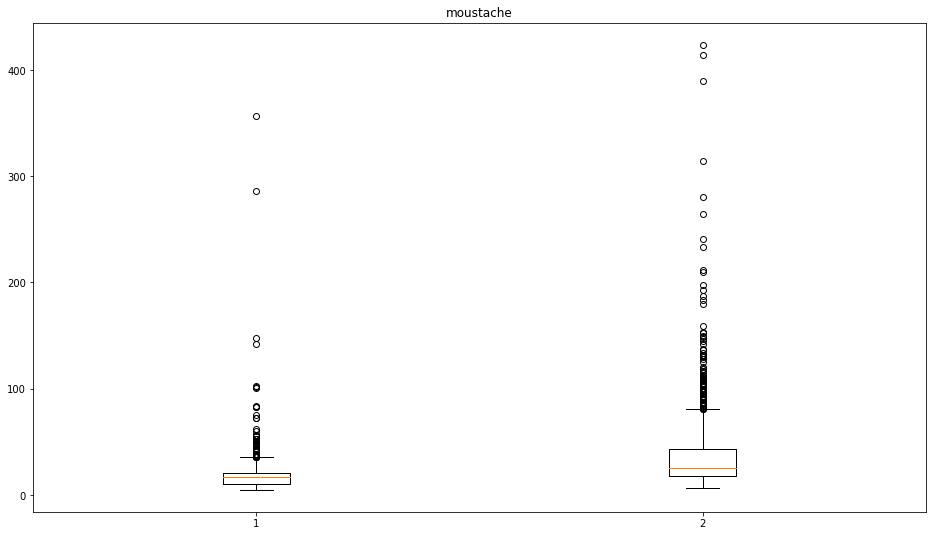

In [ ]:
plt.figure(figsize= (16, 9))

x = result_df2.fees
y = result_df2.shipping_cost_euro

plt.boxplot([x, y])

plt.title('moustache')

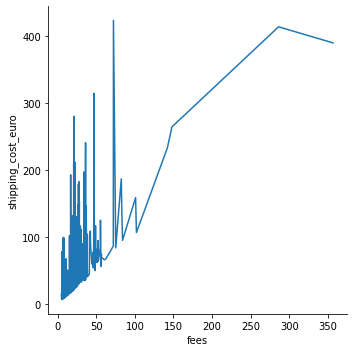

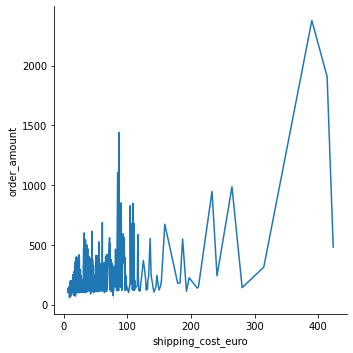

In [ ]:
sns.relplot(x='fees', y='shipping_cost_euro', kind='line', data=(result_df2[result_df2['CA']<0]));

sns.relplot(y='order_amount', x='shipping_cost_euro', kind='line', data=result_df2);

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>  III - <a name="test"></a> Conclusion
 </h1></center>
<hr style="border-width:2px;border-color:#75DFC1">

In [ ]:

Pour répondre de manière pertinente aux questions analytiques, il nous aurait fallu un jeu de données plus fourni avec par exemple : 

_ typologie des produits 
_ poids des commandes 
_ Dates
_ Views des retailers 

D ailleurs je ne peux pas travailler sur la question 4 du questionnaire SQL car le dataframe ne contient pas les colonnes attendues

En l état, on constate d une part des valeurs abérantes qui viennent considérablement dégrader les resultats : 
EX > Brand 95 ou Retailer 17 

Je vais proposer 2 axes principaux d amélioration sur l UNIQUE base du dataframe en ma possession 

Sur le bon de 100 Euros supporté par AK 
  - Partager le coût avec le brand ce qui aurait permis de diminuer la perte de 25 900 euros (ou à partir de la 2e utilisation)
  - le limiter à une utilisation (multifournisseurs) par retailer ce qui aurait permis une reduction de perte de 4200 euros 

In [ ]:
Enfin et surtout, sur la partie transport ; 

Il semblerait, d une part, que les fournisseurs ne soit pas du tout sensibilisés aux coûts de transport dans la mesure au celui-ci est supporté par AK

Il est indispensable d établir des règles à ce sujet
  - formation sur le poids volumétrique 
  - limiter, dans la mesure du possible, les colis sur la tranche 0 - 30 kilos quitte à faire du multi colis 

  -> il n est pas économiquement justifié de prendre en charge le transport compte tenu des habitudes consommateurs et du marché sur lequel est positionné AK

Les frais de livraison correspondent à 40% des coûts d’une entreprise de vente en ligne et plus de 80% des E-Commerces français ne proposent pas une offre complète de transport à l’international.

CEPENDANT

Je pense que la force (et l augementation du resultat) d AK réside dans sa force de négociation et de mutualisation.

Le volume d affaires généré par la plateforme la légitime auprès des opérateurs  

J entamerais des négocations serieuse avec les transporteurs (express & fret) nationaux et internationaux afin d obtenir des tarifs de transport négociés et bloqués sur la base du volume totale généré par les clients d AK 

S agissant d un sujet que je maitrise, avec les bonnes données, je pourrais quantifier celà mais en l état : 

Sur une relation B2B, la prise en charge par le fournisseur des frais de transport est quelque chose qui peut facilement s entendre, surtout considérent le panier moyen des retailers et le franco qu on peut considérer normale dans ces relations d affaires afin de fidéliser le retailer

Bénéficier de tarifs négociés, sur le volume, chez les transporteurs vous permettrait de 
  vous ouvrir sur de nouveaux pays
  proposer une offre intégré et complète aux clients finaux & aux meilleurs prix, donc améliorer l expérience utilisateur 
  générer une source de revenue suppléméntaire et considérable en se commissionnant sur le coût de transport et éventuellement une Ad valorem 

  Si la négociation aboutie à une baisse de 50 ou 60 % ( par exemple ) sur le tarif habituellement proposé au brand, il serait tout à fait logique d augmenter le cout transport de 15 ou 20 % pour la gestion de l offre intégré, les étiquettes, le SAV ... etc 